In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
sns.set_style('whitegrid')

In [3]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
dataset = pd.read_csv('u.data',sep='\t',names=column_names)
dataset.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [5]:
movie_titles = pd.read_csv('Movie_Id_Titles')
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [6]:
dataset = pd.merge(dataset,movie_titles,on='item_id')
dataset.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [8]:
ratings = pd.DataFrame(dataset.groupby('title')['rating'].mean())

In [9]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [10]:
ratings['num of ratings'] = pd.DataFrame(dataset.groupby('title')['rating'].count())

In [11]:
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


Text(0.5, 0, 'No. of Ratings')

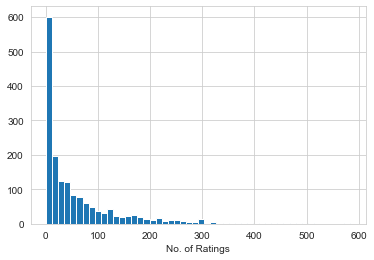

In [21]:
ratings['num of ratings'].hist(bins=50)
plt.xlabel('No. of Ratings')

Text(0, 0.5, 'Count')

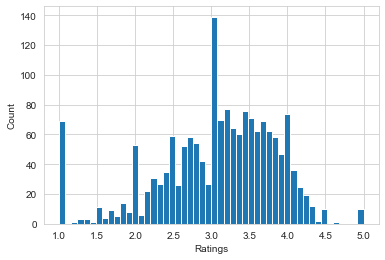

In [22]:
ratings['rating'].hist(bins=50)
plt.xlabel('Ratings')
plt.ylabel('Count')

In [ ]:
# Low rating movies have low number of people rating them. 
# Higher rating movies have more people rating them.
# Jointplot below

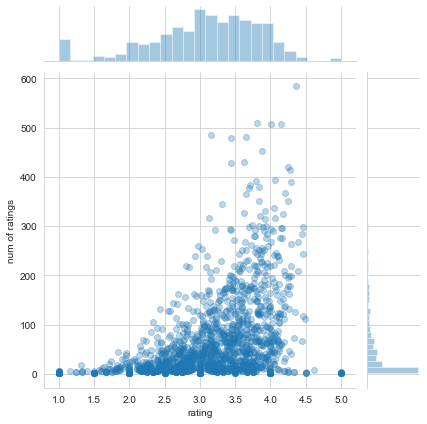

In [24]:
sns.jointplot(x='rating',y='num of ratings', data=ratings,alpha=0.3)